In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
from abc import ABC, abstractmethod 

# MNIST dataset with Pytorch

For the first application of a Neural Network using the torch.nn [torch.nn](https://pytorch.org/docs/stable/nn.html) class of PyTorch, we want to use the famous MNIST dataset. This dataset contains a large number of images of handwritten digits. The images are formatted in 28×28 pixels with a value between 0 and 255 for each pixel.

We can get it via the Torchvision datasets and format it into a tensor.

In [2]:
# create train and test data set as Tensors
train_dataset = dsets.MNIST(root = './data',train = True,transform = transforms.ToTensor(),download = True)
train_dataset, _ = torch.utils.data.random_split(train_dataset, [1000,59000])
test_dataset = dsets.MNIST(root = './data',train = False ,transform = transforms.ToTensor())
test_dataset, _ = torch.utils.data.random_split(test_dataset, [500,9500]) # already shaked
print("Number of samples in trainset : ", len(train_dataset))
print("Number of samples in testset :", len(test_dataset))

Number of samples in trainset :  1000
Number of samples in testset : 500


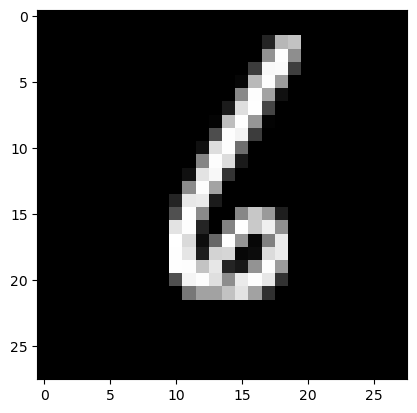

In [3]:
# example image
sample_image = torch.Tensor.numpy(train_dataset[0][0][0])
plt.imshow(np.reshape(sample_image, [28,28]),cmap ='gray')
plt.show()

### DataLoader

In [26]:
batch_size = 64

# load dataset using data loader
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

### Model Hyper-Parameters

 In the next step, we need to set the parameters of our NN. The goal is to find appropriate values for 
 * input size
 * hidden neurons 
 * number of possible classes (outputs)
 * learning rate for the optimizer
 * number of epochs to train your net
 * the batch size of the training data

In [5]:
# define hyperparameters of NN
input_size = 784 
layer_1 = 256
layer_2 = 128
layer_3 = 64
num_classes = 10
num_epochs =50
learning_rate = 0.0015

>Also, use the *cuda*-device to speed up the training process.

In [6]:
if torch.cuda.is_available():
    device =  torch.device("cuda")
else:
    device = torch.device("cpu")
print(device)

cpu


## The NN class of Pytorch

Now we want to use the [nn.Module ](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) of PyTorch and see the differences between some activation functions. To achieve this, you have to create a basic net class from which you can inherit.  This class should also contain a <br>function to examine the test's accuracy and train data to evaluate the training process.


After that, create NNs that inherits from your BaseNet class and use the following different activation functions:

 * Linear without activation functions
 * Tanh
 * Sigmoid
 * ReLU
 
Create for each activation function a separate NN!

In [7]:
class BaseNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_input = nn.Linear(784,256)
        self.layer_hidden_one = nn.Linear(256,128)
        self.layer_hidden_two = nn.Linear(128,64)
        self.layer_output = nn.Linear(64,10)
    @abstractmethod
    def forward(self,x):
        pass

In [8]:
class NetLinear(BaseNet):
    def forward (self, x):
        out = self.layer_input(x)
        out = self.layer_hidden_one(out)
        out = self.layer_hidden_two(out)
        out = self.layer_output(out)
        return out

In [9]:
class NetTanh(BaseNet):
    def __init__(self):
        super().__init__()
        self.tanh = nn.Tanh()
    def forward (self, x):
        out = self.tanh(self.layer_input(x))
        out = self.tanh(self.layer_hidden_one(out))
        out = self.tanh(self.layer_hidden_two(out))
        out = self.layer_output(out) # output layer die Output scalieren und nur für die addition der voerherigen Layer zuständig und keinen nächsten aktivieren sollen
        return out

In [10]:
class NetSigmoid(BaseNet):
    def __init__(self):
        super().__init__()
        self.sigmoid = nn.Sigmoid()
    def forward (self, x):
        out = self.sigmoid(self.layer_input(x))
        out = self.sigmoid(self.layer_hidden_one(out))
        out = self.sigmoid(self.layer_hidden_two(out))
        out = self.layer_output(out)
        return out

In [11]:
class NetReLu(BaseNet):
    def __init__(self):
        super().__init__()
        self.relu = nn.ReLU()
    def forward (self, x):
        out = self.relu(self.layer_input(x))
        out = self.relu(self.layer_hidden_one(out))
        out = self.relu(self.layer_hidden_two(out))
        out = self.layer_output(out)
        return out

In [12]:
x_, y_ = next(iter(train_loader))

In [13]:
netLinear = NetLinear()
outLinear = netLinear(x_.view(-1, 28*28))
outLinear

tensor([[-0.0964, -0.0713,  0.1039, -0.0661,  0.0657,  0.0827,  0.0333, -0.0603,
          0.0957,  0.0652],
        [-0.0932, -0.0551,  0.0850, -0.0599,  0.0895,  0.0685,  0.0296, -0.0514,
          0.0799,  0.0305],
        [-0.1019, -0.0087,  0.1393, -0.0833,  0.0827,  0.0873,  0.0386, -0.0658,
          0.0803,  0.0187],
        [-0.1483, -0.0333,  0.1430, -0.0144,  0.1169,  0.1128,  0.0155, -0.0912,
          0.0537,  0.0692],
        [-0.1628, -0.0592,  0.1016, -0.0908,  0.0358,  0.1237,  0.0672, -0.0769,
          0.0305,  0.0572],
        [-0.1512, -0.0816,  0.0809, -0.1135,  0.0760,  0.0575,  0.0323, -0.0264,
          0.0774,  0.0487],
        [-0.0901, -0.0569,  0.1157, -0.0491,  0.0823,  0.1038, -0.0069, -0.1154,
          0.0899,  0.0375],
        [-0.1151, -0.0570,  0.0795, -0.0590,  0.0949,  0.0889,  0.0330, -0.0282,
          0.0954,  0.0279],
        [-0.1711, -0.0177,  0.0982, -0.0343,  0.0650,  0.0624,  0.0133, -0.0831,
          0.1091,  0.0761],
        [-0.1069, -

In [14]:
netTanh = NetTanh()
outTanh = netTanh(x_.view(-1, 28*28))
outTanh.shape

torch.Size([16, 10])

In [15]:
netSigmoid = NetSigmoid()
outSigmoid = netSigmoid(x_.view(-1, 28*28))
outSigmoid.shape

torch.Size([16, 10])

In [16]:
netReLu = NetReLu()
outReLu = netReLu(x_.view(-1, 28*28))
outReLu.shape

torch.Size([16, 10])

If you want to train your NN you have to initialize a criterion for the loss. In this case please use the [cross-entropy](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) loss function.

In [17]:
# loss function

criterion = nn.CrossEntropyLoss()

Write a function that calculates the loss and accuracy of the test dataset!

In [18]:
def test_function(net):
    loss_test = 0
    correct = 0
    total = 0
    
    for i, (images, labels) in enumerate(test_loader):
        images = images.view(-1, 28*28)
        outputs = net(images)
        loss = criterion(outputs, labels)
        
        loss_test += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    loss = loss_test/len(test_loader)
    accuracy = 100 * correct/ total
    
    return loss, accuracy

In [19]:
def get_accuracy(net):    
    # TODO

SyntaxError: incomplete input (3864340575.py, line 2)

In [26]:
net = NetLinear()
loss, accuracy = test_function(net)
loss

torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32
torch.float32


2.3005805984139442

The following class will allow you to visualize the learning process. Just use the append functions of this class to add your evaluated values for the train's accuracy and test set to the final plot. The x_axis should be an accordingly scaled time axis. Run the `plot()` function after training to show your results.

In [20]:
%matplotlib inline 
class Plot:
    def __init__(self, initial_test):
        self.loss_train = [initial_test]
        self.loss_test = [initial_test]
        self.x_axis = [0]
        
    def append_loss_train(self, loss):
        self.loss_train.append(loss)
        
    def append_loss_test(self, loss):
        self.loss_test.append(loss)
    
    def append_x_axis(self, x_axis):
        self.x_axis.append(x_axis)
        
    def plot(self): 
        limit = max(max(self.loss_train), max(self.loss_test))
        fig, ax1 = plt.subplots()
        color = 'tab:red'
        ax1.set_xlabel('epochs')
        ax1.set_ylabel('Loss train', color=color)
        ax1.set_ylim([0,limit])
        ax1.plot(self.x_axis, self.loss_train, color=color)
        ax1.tick_params(axis='y', labelcolor=color)


        ax2 = ax1.twinx()

        color = 'tab:blue'
        ax2.set_ylabel('Loss test', color=color)
        ax2.plot(self.x_axis, self.loss_test, color=color)
        ax2.tick_params(axis='y', labelcolor=color)
        ax2.set_ylim([0,limit])

        
        fig.tight_layout()
        plt.show()

Now let's write a function to train a NN. PyTorch has different [optimizers](https://pytorch.org/docs/stable/optim.html). An often used one is the ADAM algorithm, so use this to train your NNs.<br>
If it is possiable, put the net, images, and labels on the GPU! <br> 

In [30]:
def train_net(net):
    
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    plot = Plot(test_function(net)[0])
    
    loss_epoch = []
    accuracy_epoch = []
    
    for epoch in range(num_epochs):

        loss_train = 0
        correct = 0
        total = 0


        for i, (images, labels) in enumerate(train_loader):
            images = images.view(-1, 28*28)
            outputs = net(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_train += loss.item()
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
        loss_test, accuracy = test_function(net)
        loss_train = loss_train / len(train_loader)
            
        plot.append_loss_test(loss_test)
        plot.append_loss_train(loss_train)
        plot.append_x_axis(epoch + (i+1)/len(train_dataset)//batch_size)

        loss = loss_train/len(train_loader)
        accuracy = 100 * correct/ total
        
        loss_epoch.append(loss)
        accuracy_epoch.append(accuracy)
        
        if (epoch + 1) % 5 == 0:
            print('Epoch [%d/%d], loss train: %.8f, loss test: %.8f, accuracy test: %.2f' %(epoch+1, num_epochs, loss_train, loss_test, accuracy))
    
    plot.plot()
    
    return loss_epoch, accuracy_epoch

Epoch [5/50], loss train: 0.34103843, loss test: 0.46177269, accuracy test: 90.30
Epoch [10/50], loss train: 0.17420411, loss test: 0.42720275, accuracy test: 94.40
Epoch [15/50], loss train: 0.05535306, loss test: 0.44764825, accuracy test: 98.60
Epoch [20/50], loss train: 0.01871890, loss test: 0.40643157, accuracy test: 99.60
Epoch [25/50], loss train: 0.00218458, loss test: 0.44136608, accuracy test: 100.00
Epoch [30/50], loss train: 0.00132362, loss test: 0.46590922, accuracy test: 100.00
Epoch [35/50], loss train: 0.00093310, loss test: 0.48358880, accuracy test: 100.00
Epoch [40/50], loss train: 0.00070265, loss test: 0.49835585, accuracy test: 100.00
Epoch [45/50], loss train: 0.00055113, loss test: 0.51137846, accuracy test: 100.00
Epoch [50/50], loss train: 0.00044558, loss test: 0.52310117, accuracy test: 100.00


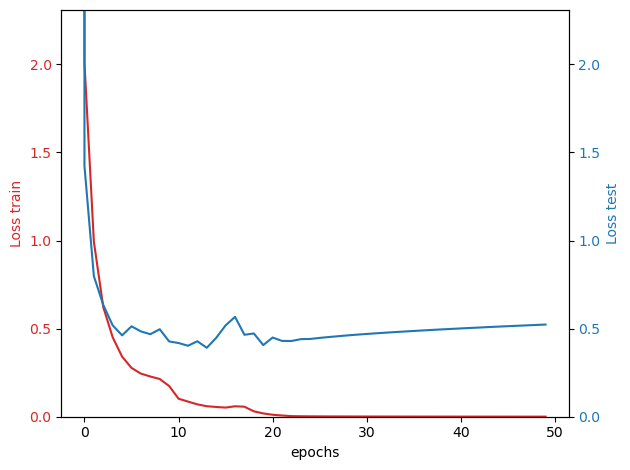

([0.12565242126584053,
  0.06209157407283783,
  0.038876563659869134,
  0.028169126948341727,
  0.0213149021146819,
  0.017314813449047506,
  0.015286235749954358,
  0.014269670064095408,
  0.013376915216213092,
  0.010887756739975885,
  0.006395212156348862,
  0.005363788448448759,
  0.004382536164484918,
  0.003725727707205806,
  0.003459566280071158,
  0.003245365180191584,
  0.0037057061163068283,
  0.0035503009530657437,
  0.0019149523322994355,
  0.001169931459116924,
  0.0006959588808967965,
  0.00043418148288765224,
  0.00021664083169525838,
  0.00016389452252951742,
  0.00013653599125973415,
  0.00012039986199852137,
  0.00010804365570038499,
  9.808773620534339e-05,
  8.983290217656759e-05,
  8.272628110717051e-05,
  7.656674893041782e-05,
  7.119191570836847e-05,
  6.642546964030771e-05,
  6.21586152647069e-05,
  5.831847943227331e-05,
  5.487449141128309e-05,
  5.1739811965489935e-05,
  4.890382751909783e-05,
  4.6292678689496825e-05,
  4.391580682749918e-05,
  4.1710108007

In [31]:
net = NetReLu()
train_net(net)

Well done! You have now seen how different nets with different activation functions learn. And the longer a NN learns, the better it does its job. But when NN learns too long, **overfitting** becomes an issue. A net *overfits* when it learns the particular examples from `train_dataset` and no longer in general. But there is a way to avoid it.
### Regularization
We will take a look at four types of regularization:
* Weight decay
* L1 regularization
* Max norm constraints
* Dropout

All work differently and are suitable for various tasks. Let's take a closer look.

#### Weight decay (L2 Regularization)

The idea of L2 regularization is to add a *regularization term* to the cost function, so that small weights will be preferred. The cost function looks like this:
$ C = C_0 + \frac{\lambda}{2n}
\sum_w w^2,$
where $C_0$ stands for the original cost function, $\lambda$ for a regularization parameter, $w$ for weights in the NN, and $n$ for its size. (n is the size for nn, layerwise)

Now you should implement this regularization type. Write your implementation of L2. Don't use the implementation from PyTorch. Use it to improve the accuracy of your linear NN.

In [42]:
# class
### SOLUTION ###
class NetTanh_L2(NetReLu):
    def l2_weights(self):
        l2_weights = torch.sum(torch.pow(self.layer_input.weight.data, 2))
        l2_weights += torch.sum(torch.pow(self.layer_hidden_one.weight.data, 2))
        l2_weights += torch.sum(torch.pow(self.layer_hidden_two.weight.data, 2))
        l2_weights += torch.sum(torch.pow(self.layer_output.weight.data, 2))
        return l2_weights
### ENDSOLUTION ###

Epoch [5/100], Step[16/15],loss train: 0.40861010 , loss test: 0.53262325 , accuracy : 81.40
Epoch [10/100], Step[16/15],loss train: 0.18053548 , loss test: 0.44108426 , accuracy : 86.60
Epoch [15/100], Step[16/15],loss train: 0.08750894 , loss test: 0.50457110 , accuracy : 83.80
Epoch [20/100], Step[16/15],loss train: 0.10324030 , loss test: 0.45806471 , accuracy : 89.40
Epoch [25/100], Step[16/15],loss train: 0.00999566 , loss test: 0.38201582 , accuracy : 89.80
Epoch [30/100], Step[16/15],loss train: 0.00342611 , loss test: 0.40927774 , accuracy : 90.80
Epoch [35/100], Step[16/15],loss train: 0.00206847 , loss test: 0.43578192 , accuracy : 91.40
Epoch [40/100], Step[16/15],loss train: 0.00143244 , loss test: 0.45594975 , accuracy : 91.20
Epoch [45/100], Step[16/15],loss train: 0.00106130 , loss test: 0.47334558 , accuracy : 91.20
Epoch [50/100], Step[16/15],loss train: 0.00082141 , loss test: 0.48947906 , accuracy : 91.00
Epoch [55/100], Step[16/15],loss train: 0.00065609 , loss tes

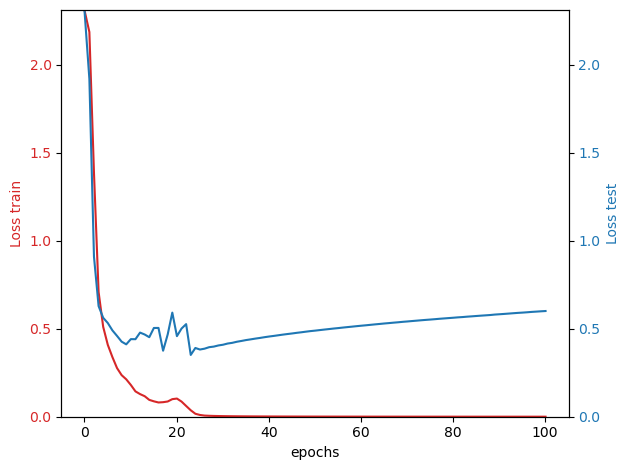

In [49]:
learning_rate = 0.001
num_epochs = 100

# training
# initialize net and optimizer
lambda_l2 = 0.1
nn_size = input_size*256 + 256*128 + 128*64 + 64 * 10
net_linear = NetTanh_L2()
net_linear = net_linear.to(device)
optimizer_linear = torch.optim.Adam(net_linear.parameters(),lr = learning_rate)
plot = Plot(test_function(net_linear)[0])
for epoch in range(num_epochs):
    loss_train = 0
    for i,(images, labels) in enumerate(train_loader):
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)
        optimizer_linear.zero_grad()
        outputs = net_linear(images)
        
        loss_0 = criterion(outputs, labels)
        loss_train += loss_0.item()
        
        l2_reg = lambda_l2/(2 * nn_size) * net_linear.l2_weights()
        
        #######

        ## TODO
        
        loss = loss_0 + l2_reg
        
    

        #######
        loss.backward()
        optimizer_linear.step()
        
    loss_test, accuracy = test_function(net_linear)
    loss_train = loss_train/len(train_loader)
    plot.append_loss_test(loss_test)
    plot.append_loss_train(loss_train)
    plot.append_x_axis(epoch + (i + 1)/(len(train_dataset)//batch_size))
    if (epoch + 1) % 5 == 0:
        print('Epoch [%d/%d], Step[%d/%d],loss train: %.8f , loss test: %.8f , accuracy : %.2f'%(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss_train, loss_test, accuracy))
plot.plot()

#### L1 Regularization
It is similar to L2 regularization but the regularization term looks different:
\begin{eqnarray}  C = C_0 + \frac{\lambda}{n} \sum_w |w|.\end{eqnarray}
Implement this regularization type in one of your NNs. Again don't use the PyTorch implementation and write it on your own.

In [60]:
# class
### SOLUTION ###
class NetSigmoid_L1(NetTanh):
    def l1_weights(self):
        l1_weights = torch.sum(torch.abs(self.layer_input.weight.data))
        l1_weights += torch.sum(torch.abs(self.layer_hidden_one.weight.data))
        l1_weights += torch.sum(torch.abs(self.layer_hidden_two.weight.data))
        l1_weights += torch.sum(torch.abs(self.layer_output.weight.data))
        return l1_weights
### ENDSOLUTION ###

Epoch [10/400], Step[16/15],loss train: 1.77938426 , loss test: 1.72907418 , accuracy : 58.80
Epoch [20/400], Step[16/15],loss train: 1.24706844 , loss test: 1.25504467 , accuracy : 71.20
Epoch [30/400], Step[16/15],loss train: 0.94173901 , loss test: 0.98760145 , accuracy : 79.40
Epoch [40/400], Step[16/15],loss train: 0.74685077 , loss test: 0.81816746 , accuracy : 81.60
Epoch [50/400], Step[16/15],loss train: 0.61207957 , loss test: 0.70245101 , accuracy : 83.60
Epoch [60/400], Step[16/15],loss train: 0.51282615 , loss test: 0.62169186 , accuracy : 84.80
Epoch [70/400], Step[16/15],loss train: 0.43644683 , loss test: 0.56499913 , accuracy : 85.60
Epoch [80/400], Step[16/15],loss train: 0.37563993 , loss test: 0.52501510 , accuracy : 86.40
Epoch [90/400], Step[16/15],loss train: 0.32566376 , loss test: 0.49663862 , accuracy : 86.00
Epoch [100/400], Step[16/15],loss train: 0.28354910 , loss test: 0.47630338 , accuracy : 86.00
Epoch [110/400], Step[16/15],loss train: 0.24761662 , loss 

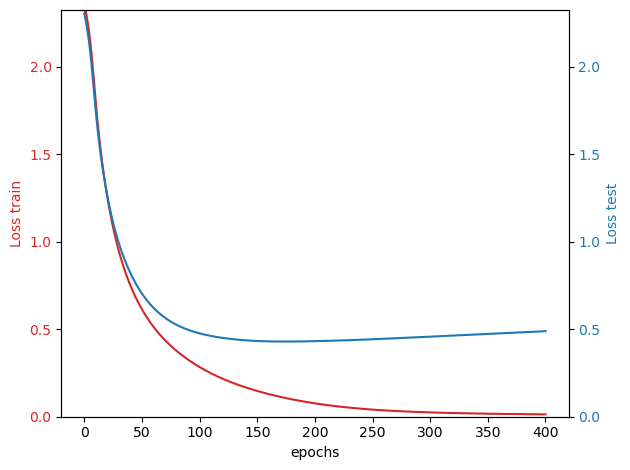

In [61]:
learning_rate = 0.00005
num_epochs = 400

# training
# initialize net and optimizer
net_sigmoid  = NetSigmoid_L1().to(device)
optimizer_sigmoid = torch.optim.Adam(net_sigmoid.parameters(),lr = learning_rate) #torch.optim.SGD(net_sigmoid.parameters(),lr = learning_rate)
plot = Plot(test_function(net_sigmoid)[0])
### ENDSOLUTION ###
#train the net
### SOLUTION ###
lambda_l1 = 0.5
nn_size = input_size*256 + 256*128 + 128*64 + 64 * 10
for epoch in range(num_epochs):
    loss_train = 0
    for i,(images, labels) in enumerate(train_loader):
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)
        optimizer_sigmoid.zero_grad()
        outputs = net_sigmoid(images)

        #######

        ## TODO
        loss_0 = criterion(outputs, labels)
        loss_train += loss_0.item()
        
        l1_reg = lambda_l1/(2 * nn_size) * net_sigmoid.l1_weights()
        
        
        loss = loss_0 + l1_reg
        

        #######
        
        loss.backward()
        optimizer_sigmoid.step()
        loss_train += loss.item() * images.size(0)
        
    loss_test, accuracy = test_function(net_sigmoid)
    loss_train = loss_train/len(train_dataset)
    plot.append_loss_test(loss_test)
    plot.append_loss_train(loss_train)
    plot.append_x_axis(epoch + (i + 1)/(len(train_dataset)//batch_size))
    if (epoch + 1) % 10 == 0:
        print('Epoch [%d/%d], Step[%d/%d],loss train: %.8f , loss test: %.8f , accuracy : %.2f'%(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss_train, loss_test, accuracy))
plot.plot()


#### Dropout
This regularization type works differently than the others. It does not affect weights. It "switches" some of them off in the hidden layer with probability $p$. In this case, you can use the implementation of PyTorch!

In [71]:
# class
class NetDropOut(BaseNet):
    def __init__(self):
        super().__init__()
        self.dropout = nn.Dropout(p=0.05)
        self.activation = nn.ReLU()

    def forward (self, x):
        # Solution
        out = self.dropout(self.activation(self.layer_input(x)))
        out = self.dropout(self.activation(self.layer_hidden_one(out)))
        out = self.dropout(self.activation(self.layer_hidden_two(out)))
        out = self.layer_output(out)
        return out

Epoch [10/400], loss train: 2.05135963 , loss test: 2.02092208 , accuracy : 53.20
Epoch [20/400], loss train: 1.22597261 , loss test: 1.23242779 , accuracy : 68.60
Epoch [30/400], loss train: 0.81384222 , loss test: 0.87770730 , accuracy : 74.80
Epoch [40/400], loss train: 0.60459172 , loss test: 0.70786314 , accuracy : 79.60
Epoch [50/400], loss train: 0.51218020 , loss test: 0.61261010 , accuracy : 81.00
Epoch [60/400], loss train: 0.42265421 , loss test: 0.54286563 , accuracy : 84.20
Epoch [70/400], loss train: 0.36465935 , loss test: 0.51444201 , accuracy : 83.20
Epoch [80/400], loss train: 0.32974604 , loss test: 0.48934969 , accuracy : 84.40
Epoch [90/400], loss train: 0.29026955 , loss test: 0.48544626 , accuracy : 84.40
Epoch [100/400], loss train: 0.25788820 , loss test: 0.48629735 , accuracy : 85.40
Epoch [110/400], loss train: 0.23442750 , loss test: 0.47272700 , accuracy : 85.60
Epoch [120/400], loss train: 0.20928371 , loss test: 0.45231502 , accuracy : 85.80
Epoch [130/40

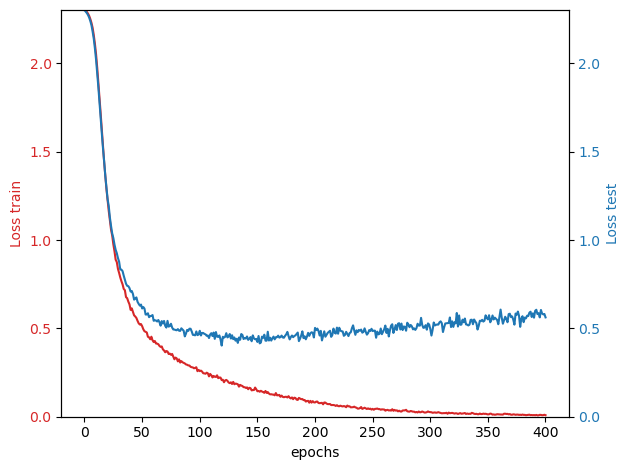

In [73]:
learning_rate = 0.00005
num_epochs = 400

# training
# initialize net and optimizer

net_relu = NetDropOut()
optimizer_relu = torch.optim.Adam(net_relu.parameters(),lr = learning_rate)
plot = Plot(test_function(net_relu)[0])


# train the net
for epoch in range(num_epochs):
    loss_train = 0
    for i,(images, labels) in enumerate(train_loader):
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)
        optimizer_relu.zero_grad()
        outputs = net_relu(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_relu.step()
        loss_train += loss.item() * images.size(0)
    loss_test, accuracy = test_function(net_relu)
    loss_train = loss_train/len(train_dataset)
    plot.append_loss_test(loss_test)
    plot.append_loss_train(loss_train)
    plot.append_x_axis(epoch + (i + 1)/(len(train_dataset)//batch_size))
    if (epoch + 1) % 10 == 0:
        print('Epoch [%d/%d], loss train: %.8f , loss test: %.8f , accuracy : %.2f'%(epoch+1, num_epochs, loss_train, loss_test, accuracy))
plot.plot()

You are almost done! Play around with the parameters. You can also try to combine some regularization types (for example, it is a standard rule that max norm constraint and dropout suit each other very well).